In [299]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chrisbyrnes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [300]:
data = pd.read_csv('Shoes_NLP.csv',header=None)

In [301]:
data.rename(columns={0:'brand',1:'stars',2:'review'},inplace=True)
print(data.columns)

Index(['brand', 'stars', 'review'], dtype='object')


In [302]:
data['review']=data['review'].astype('string')
data['stars']=data['stars'].astype('int')
data['brand']=data['brand'].astype('string')

In [303]:
data.head(10)

,brand,stars,review
0,Adidas,5,Great shoes! Exercise in everyday
1,Adidas,5,...Extremely Comfortable...
2,Adidas,5,...that will make you wanna go and write a rev...
3,Adidas,5,❤️it! 🥰 Excellent 👍🏻👍🏻👍🏻 A+++
4,Adidas,5,0.73lbs (or 329g) shoes that fit like marshmal...
5,Adidas,5,10/10 best shoes ever! Would buy again when th...
6,Adidas,5,100% recommend these shoes. The fit and comfor...
7,Adidas,5,100% would recommend for style but for workout...
8,Adidas,5,2nd pair! Great for running 3-8 miles. Very cu...
9,Adidas,5,2nd pair.. love them so much. Very comfy and v...


In [304]:
data['review'].dtypes

StringDtype

In [305]:
data['review_tok']=data['review'].astype('string')

In [306]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['review_tok'] = data.review.map(alphanumeric).map(punc_lower)
data.head()

,brand,stars,review,review_tok
0,Adidas,5,Great shoes! Exercise in everyday,great shoes exercise in everyday
1,Adidas,5,...Extremely Comfortable...,extremely comfortable
2,Adidas,5,...that will make you wanna go and write a rev...,that will make you wanna go and write a rev...
3,Adidas,5,❤️it! 🥰 Excellent 👍🏻👍🏻👍🏻 A+++,❤️it 🥰 excellent 👍🏻👍🏻👍🏻 a
4,Adidas,5,0.73lbs (or 329g) shoes that fit like marshmal...,or shoes that fit like marshmallows \r...


In [307]:
data['review_tok'] =  data['review_tok'].apply(word_tokenize)

In [308]:
wn = WordNetLemmatizer()
blocker_words = ["shoe","shoes","foot","feet"]
def lemmatization(token_text):
    text = [wn.lemmatize(word) for word in token_text if word not in stop_words and wn.lemmatize(word) not in blocker_words]
    return text

In [309]:
data['rev_lem'] = data['review_tok'].apply(lambda x : lemmatization(x))

In [310]:
data.head()

,brand,stars,review,review_tok,rev_lem
0,Adidas,5,Great shoes! Exercise in everyday,"[great, shoes, exercise, in, everyday]","[great, exercise, everyday]"
1,Adidas,5,...Extremely Comfortable...,"[extremely, comfortable]","[extremely, comfortable]"
2,Adidas,5,...that will make you wanna go and write a rev...,"[that, will, make, you, wan, na, go, and, writ...","[make, wan, na, go, write, review, even, incre..."
3,Adidas,5,❤️it! 🥰 Excellent 👍🏻👍🏻👍🏻 A+++,"[❤️it, 🥰, excellent, 👍🏻👍🏻👍🏻, a]","[❤️it, 🥰, excellent, 👍🏻👍🏻👍🏻]"
4,Adidas,5,0.73lbs (or 329g) shoes that fit like marshmal...,"[or, shoes, that, fit, like, marshmallows, i, ...","[fit, like, marshmallow, usually, wear, anywhe..."


In [311]:
from sklearn.decomposition import NMF
from sklearn import decomposition
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [312]:
stop_words = stopwords.words('english')
stop_words.extend(["shoe", "shoes"])
data['rev_lem']=data['rev_lem'].astype('string')
cv = CountVectorizer(ngram_range=(1,2), binary=True,stop_words='english')
X = cv.fit_transform(data.rev_lem)
pd.DataFrame(X.toarray(), columns=cv.get_feature_names()).head(10)

,aa,aa baseball,aa couple,aa narrow,aaahhhhhh,aaahhhhhh comfortable,aahh,aahh feeling,aasics,aasics exactly,...,zumba movement,zumba purchase,zumba write,çushion,çushion felt,últimamente,últimamente mi,único,único par,único que
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [315]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(X)

/Users/chrisbyrnes/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [316]:

topic_word = pd.DataFrame(nmf_model.components_.round(3),index = ["component_1","component_2","component_3",
                        "component_4","component_5","component_6","component_7","component_8","component_9",
                        "component_10"],columns = cv.get_feature_names())
       
             
            
topic_word

,aa,aa baseball,aa couple,aa narrow,aaahhhhhh,aaahhhhhh comfortable,aahh,aahh feeling,aasics,aasics exactly,...,zumba movement,zumba purchase,zumba write,çushion,çushion felt,últimamente,últimamente mi,único,único par,único que
component_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.0
component_2,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.001,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
component_3,0.004,0.001,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
component_4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.001,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.0
component_5,0.002,0.000,0.001,0.001,0.000,0.000,0.002,0.002,0.000,0.000,...,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.0
component_6,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,...,0.000,0.002,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.0
component_7,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.004,0.004,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
component_8,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
component_9,0.004,0.000,0.002,0.000,0.001,0.001,0.001,0.001,0.000,0.000,...,0.000,0.000,0.000,0.002,0.002,0.001,0.001,0.001,0.001,0.0
component_10,0.002,0.000,0.000,0.003,0.001,0.001,0.000,0.000,0.002,0.000,...,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.0


In [317]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [318]:
display_topics(nmf_model, cv.get_feature_names(), 50)


Topic  0
wear, day, work, cute, hour, time, comfy, running, long, walk, super, walking, usually, wearing, sock, bought, got, wear day, wear work, hurt, usually wear, normally, recommend, month, comfortable wear, mile, casual, normally wear, wore, perfect, everyday, week, definitely, wear size, little, use, shift, hour day, slip, lot, pain, worn, really, working, day work, end, work day, day wear, lightweight, run

Topic  1
comfortable, super comfortable, super, lightweight, sneaker, cute, lightweight comfortable, love comfortable, extremely, extremely comfortable, cute comfortable, recommend, light comfortable, stylish, walking, comfortable lightweight, comfortable fit, comfortable cute, really comfortable, comfortable light, true, comfortable wear, really, good, fit comfortable, comfortable sneaker, true size, comfortable stylish, supportive, comfortable great, comfortable love, owned, comfortable walking, easy, long, looking, comfortable look, sneaker comfortable, buy, use, nice, ru

In [319]:
nmf_feature_names = cv.get_feature_names()
nmf_weights = nmf_model.components_

print(nmf_model.components_)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.84659523e-03 8.00116339e-04 2.03812792e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.42259376e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.78787397e-03 4.76304689e-04 1.57183926e-03 ... 1.24960306e-03
  6.89410909e-04 4.94034960e-04]
 [1.81877993e-03 0.00000000e+00 0.00000000e+00 ... 1.69406832e-05
  1.24546964e-04 0.00000000e+00]]


In [320]:
review_topic_matrix = nmf_model.transform(X)

In [321]:
review_topic_matrix_df = pd.DataFrame(review_topic_matrix).add_prefix('topic_')

review_topic_matrix_df[['raw_reviews', 'clean_reviews']] = data[['review', 'rev_lem']]
review_topic_matrix_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,raw_reviews,clean_reviews
0,0.001437,0.000000,0.000000,0.000000,0.000000,0.116493,0.000000,0.000000,0.000000,0.000000,Great shoes! Exercise in everyday,"['great', 'exercise', 'everyday']"
1,0.000000,0.135900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...Extremely Comfortable...,"['extremely', 'comfortable']"
2,0.003799,0.144499,0.139082,0.002324,0.004052,0.010828,0.042639,0.023424,0.000000,0.064874,...that will make you wanna go and write a rev...,"['make', 'wan', 'na', 'go', 'write', 'review',..."
3,0.000000,0.000188,0.000000,0.000046,0.000368,0.000295,0.000000,0.000285,0.000605,0.001133,❤️it! 🥰 Excellent 👍🏻👍🏻👍🏻 A+++,"['❤️it', '🥰', 'excellent', '👍🏻👍🏻👍🏻']"
4,0.083560,0.000000,0.000000,0.000000,0.118457,0.000000,0.096642,0.000000,0.000000,0.000000,0.73lbs (or 329g) shoes that fit like marshmal...,"['fit', 'like', 'marshmallow', 'usually', 'wea..."


In [322]:
for review in review_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(50)['raw_reviews'].values:
    print(review)
    print()

Let me start off by saying that I loved this shoe for weeks. I work 12 hour shifts in healthcare at a children’s hospital and I’m always up and walking around, so I thought that these would be a nice lightweight and comfortable shoe to wear. It started out with leg pain here and there but nothing crazy.

Then I worked 3 days in a row, which turned out to be a huge mistake. By the end of the second shift walking to my car and starting into my third shift my foot had oddly started hurting and increasingly grew to the point where I could no longer walk on it. Then on the drive home I started feeling slight back pain and by the time I got home I could hardly walk properly without feeling pain in my back and left foot.

I would NOT recommend this shoe to anyone who does a lot of walking in their job or stands for hours. I would however recommend this shoe as a day to day choice for running errands as it is super cute and light weight.

I would also recommend sizing up by at least half a siz

In [323]:
import matplotlib.pyplot as plt
%matplotlib inline

In [324]:
!pip install wordcloud

In [325]:
from wordcloud import WordCloud

df = pd.read_csv("wordcloud.csv")
df.head()

,category
0,wear
1,day
2,work
3,cute
4,hour


In [326]:
text = " ".join(cat.split()[0] for cat in df.category)
word_cloud = WordCloud(collocations = False, relative_scaling = 0,background_color = 'white',stopwords=["normally","usually", 'got'],).generate(text)

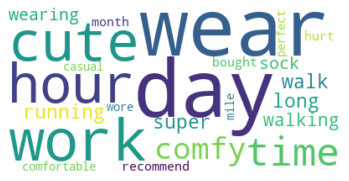

In [327]:
#Checking for NaN values
#df.isna().sum()
##Removing NaN Values
#df.dropna(inplace = True)
#Creating the text variable

# Creating word_cloud with text as argument in .generate() method

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
word_cloud.to_file("wordcloud.png")